In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('general_data.csv')

In [2]:
# Cleaning data
data_cleaned = data.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1)
data_cleaned['NumCompaniesWorked'].fillna(data_cleaned['NumCompaniesWorked'].median(), inplace=True)
data_cleaned['TotalWorkingYears'].fillna(data_cleaned['TotalWorkingYears'].median(), inplace=True)

# Encoding categorical variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

In [3]:
# Splitting the dataset
X = data_encoded.drop('Attrition_Yes', axis=1)
y = data_encoded['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

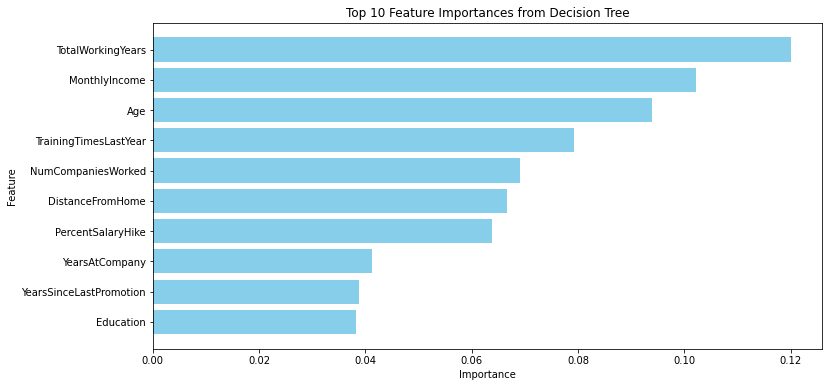

In [5]:
# Visualization of Feature Importances
feature_importances = dt_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

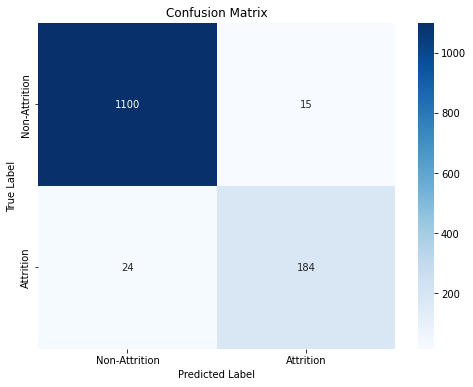

In [6]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attrition', 'Attrition'], yticklabels=['Non-Attrition', 'Attrition'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

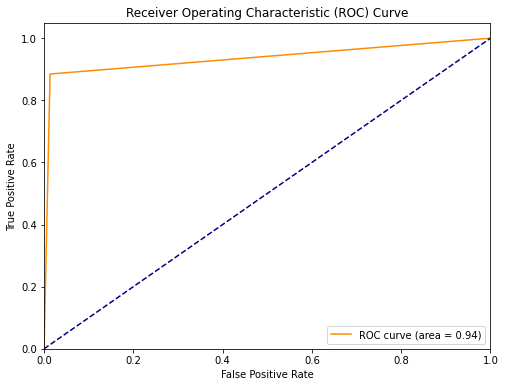

In [7]:
# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()